In [1]:
import pandas as pd

In [37]:
df = pd.read_csv('bodyPerformance.csv')

In [4]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [7]:
df.isna().any()

age                        False
gender                     False
height_cm                  False
weight_kg                  False
body fat_%                 False
diastolic                  False
systolic                   False
gripForce                  False
sit and bend forward_cm    False
sit-ups counts             False
broad jump_cm              False
class                      False
dtype: bool

In [38]:
y_train = df.pop('class')

In [39]:
X_train = df

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 10)

In [41]:
y_train.value_counts()

A    2695
D    2686
B    2668
C    2665
Name: class, dtype: int64

In [12]:
X_train.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [42]:
X_train['gender'] = X_train['gender'].replace({'M': 0, 'F': 1})
X_test['gender'] = X_test['gender'].replace({'M': 0, 'F': 1})

<ipython-input-42-fe0c32caa39f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['gender'] = X_train['gender'].replace({'M': 0, 'F': 1})
<ipython-input-42-fe0c32caa39f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['gender'] = X_test['gender'].replace({'M': 0, 'F': 1})


In [44]:
X_test = X_test[X_test['diastolic'] != 0]

In [31]:
X_train.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


In [32]:
X_train['gender'].value_counts()

0    8467
1    4925
Name: gender, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(scaled_features, columns=X_train.columns)
X_train_scaled

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,1.547898,-0.759592,1.050668,0.484820,-1.029160,-0.636348,0.936834,-1.551904,0.312650,-0.267893,0.094805
1,1.255355,-0.759592,-0.172299,-0.532156,-0.463310,-1.758239,-1.179660,-0.298060,-2.582394,-1.387509,-0.557842
2,0.304591,1.316497,-0.932201,0.014154,2.296935,1.513942,0.117546,-1.353929,0.769763,-2.787029,-2.716598
3,0.816541,1.316497,-0.801593,-1.036441,-0.835943,-1.103802,-0.223824,-0.543173,0.957296,0.781747,-0.231518
4,-0.573037,1.316497,-0.374148,-0.288418,1.965705,0.205070,-0.906564,-1.344501,-0.871153,-1.457485,-1.637220
...,...,...,...,...,...,...,...,...,...,...,...
10709,-0.426766,1.316497,-0.884707,-1.280179,0.364763,-2.038711,-1.589304,-0.995688,0.441580,-0.267893,-0.658249
10710,-0.865580,1.316497,-0.219793,-0.750679,1.110030,-0.823330,-0.565194,-0.825994,0.230605,-0.057965,-0.708453
10711,-1.084987,-0.759592,1.074415,0.425987,-0.449509,-0.168894,0.936834,0.390140,-0.214787,0.921699,0.872961
10712,0.889677,-0.759592,-0.053565,-0.280013,-0.601322,1.046488,1.824396,0.314721,0.195442,0.081987,0.195212


In [46]:
scaled_features = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(scaled_features, columns=X_test.columns)
X_test_scaled

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.061087,-0.759592,0.053297,0.804201,0.930614,0.111579,-0.701742,-0.250923,-1.164174,-0.267893,-0.030704
1,0.889677,-0.759592,-0.267287,2.520453,3.332026,0.952997,0.595464,-0.184931,-3.754477,-1.527461,-0.934369
2,-1.158123,-0.759592,0.813198,-0.110237,-0.960154,0.392052,-1.111386,0.474986,0.394696,1.341555,0.596841
3,-1.084987,1.316497,-0.184173,-1.792870,-0.159683,-1.197293,-0.906564,-2.145830,-4.000615,-1.667413,-1.687423
4,1.913577,1.316497,-0.742226,-0.708656,0.240552,-0.262384,0.254094,-1.910145,1.426129,-2.157245,-1.712525
...,...,...,...,...,...,...,...,...,...,...,...
2673,-0.061087,-0.759592,0.100790,-0.078299,-0.863545,-1.571257,-0.838290,0.229874,-0.566412,0.431867,-0.206417
2674,1.621034,-0.759592,-0.967822,-0.288418,0.157745,1.326961,1.619574,-0.307488,-0.015533,-1.317533,0.672147
2675,-0.353630,1.316497,-0.967822,-1.607965,1.220439,0.111579,0.185820,-1.052252,1.285479,-0.617773,-1.285795
2676,-1.084987,1.316497,-0.754099,-1.994584,-0.408105,0.018088,-1.179660,-1.504767,0.066513,-0.057965,-0.557842


In [47]:
y_train = y_train.replace({'A': 1, 'B': 2, 'C': 3, 'D': 4})
y_test = y_test.replace({'A': 1, 'B': 2, 'C': 3, 'D': 4})

In [36]:
y_train.value_counts()

3    3349
4    3349
1    3348
2    3347
Name: class, dtype: int64

In [48]:
import seaborn as sns

corr_matrix = X_train.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
age,1.000000,0.058399,-0.294868,-0.102746,0.241843,0.161836,0.210350,-0.182614,-0.072758,-0.544002,-0.440137
gender,0.058399,1.000000,-0.727518,-0.674573,0.552309,-0.224845,-0.319378,-0.799045,0.324339,-0.471425,-0.700974
height_cm,-0.294868,-0.727518,1.000000,0.736443,-0.515188,0.138474,0.203635,0.734467,-0.220374,0.497596,0.672144
weight_kg,-0.102746,-0.674573,0.736443,1.000000,-0.087987,0.255969,0.331962,0.702075,-0.295118,0.296744,0.478288
body fat_%,0.241843,0.552309,-0.515188,-0.087987,1.000000,0.047093,-0.031015,-0.544658,-0.072720,-0.608482,-0.677263
diastolic,0.161836,-0.224845,0.138474,0.255969,0.047093,1.000000,0.670681,0.198602,-0.064222,0.012992,0.091102
systolic,0.210350,-0.319378,0.203635,0.331962,-0.031015,0.670681,1.000000,0.279248,-0.083319,0.055873,0.145280
gripForce,-0.182614,-0.799045,0.734467,0.702075,-0.544658,0.198602,0.279248,1.000000,-0.114354,0.577034,0.743373
sit and bend forward_cm,-0.072758,0.324339,-0.220374,-0.295118,-0.072720,-0.064222,-0.083319,-0.114354,1.000000,0.176430,0.028254
sit-ups counts,-0.544002,-0.471425,0.497596,0.296744,-0.608482,0.012992,0.055873,0.577034,0.176430,1.000000,0.748276


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

grid = {'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 15, 20],
            'max_features': [3, 5, 7, 11]}

dtc_cv = GridSearchCV(
                    verbose=2,
                    estimator=tree.DecisionTreeClassifier(random_state=10),
                    param_grid=grid,
                    cv=5,
                     )

rfc_cv = GridSearchCV(
                    verbose=2,
                    estimator=RandomForestClassifier(random_state=10),
                    param_grid=grid,
                    cv=5,
                     )

dtc_cv.fit(X_train, y_train)
rfc_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........criterion=gini, max_depth=5, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=5; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=5; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=5; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=5; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=5; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=7; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, m

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11]},
             verbose=2)

In [60]:
dtc_cv.best_estimator_
df_tree = pd.DataFrame(dtc_cv.cv_results_)
rfc_cv.best_score_
df_forest = pd.DataFrame(rfc_cv.cv_results_)

In [61]:
df_tree.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008976,0.000631,0.001795,0.000399,gini,5,3,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.519832,0.496500,0.492301,0.505833,0.510271,0.504947,0.009818,32
1,0.010865,0.000665,0.001399,0.000491,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.526832,0.531031,0.504900,0.528698,0.553688,0.529030,0.015487,29
2,0.013663,0.000747,0.001596,0.000488,gini,5,7,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.572095,0.578628,0.571629,0.572562,0.547152,0.568413,0.010931,28
3,0.019547,0.001197,0.001596,0.000489,gini,5,11,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.579095,0.585161,0.575362,0.616892,0.594304,0.590163,0.014820,23
4,0.012566,0.000489,0.001598,0.000486,gini,10,3,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.587494,0.572095,0.605693,0.585161,0.626050,0.595299,0.018739,20


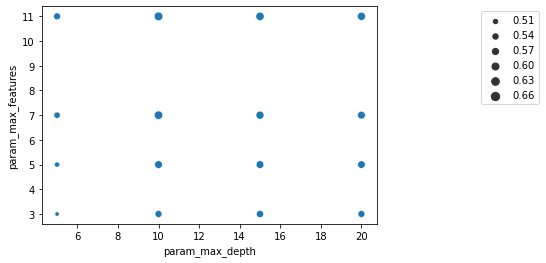

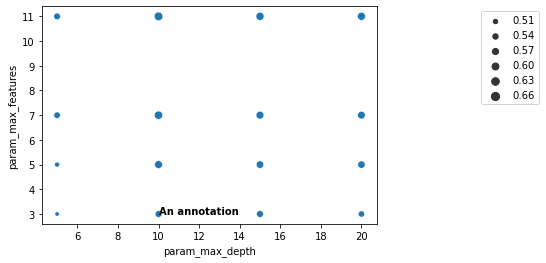

In [79]:
import matplotlib.pyplot as plt

sns.scatterplot(data=df_tree[df_tree['param_criterion'] == 'gini'], x='param_max_depth', y='param_max_features', size='mean_test_score')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()
sns.scatterplot(data=df_tree[df_tree['param_criterion'] == 'entropy'], x='param_max_depth', y='param_max_features', size='mean_test_score')
plt.text(10, 3, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()
# for i, txt in enumerate(df_tree['mean_test_score']):
#     plt.annotate(txt, (5, 4))